# Enhancing Vision with Convolutional Neural Networks

## Sequential Neural Network

In [1]:
# importando o pacote tensorflow no python
import tensorflow as tf

In [2]:
# carregando os dados
fashion_mnist = tf.keras.datasets.fashion_mnist

In [3]:
# separando os dados de treinamento e dados de teste
(training_images, training_labels), (test_images, test_labels) = fashion_mnist.load_data() 

training image label: 9


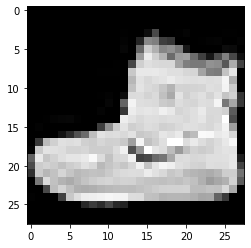

In [4]:
# visualizando o estilo dos dados
from matplotlib.pyplot import imshow
imshow(training_images[0], cmap = 'gray')
print('training image label:', training_labels[0])

In [5]:
# normalizando os dados de treinamento e dados de teste
training_images = training_images / 255
test_images = test_images / 255

In [6]:
print('training images shape:', training_images.shape)
print('training labels shape:', training_labels.shape)
print('test images shape:', test_images.shape)
print('test labels shape:', test_labels.shape)

training images shape: (60000, 28, 28)
training labels shape: (60000,)
test images shape: (10000, 28, 28)
test labels shape: (10000,)


In [7]:
# definindo o modelo da rede neural
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Flatten(input_shape  = (28, 28)),
                                    tf.keras.layers.Dense(128, activation = tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation = tf.nn.softmax)
])

In [8]:
# definindo uma classe para determinação do callback de limite na acurácia
class myCallbacks(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs = {}):
    if (logs.get('accuracy') > 0.99):
      print("\nReached 99% accuracy so cancelling training!")
      self.model.stop_training = True

In [9]:
# instanciando um objeto da classe myCallbacks
callbacks = myCallbacks()

In [10]:
# definindo os detalhes de compilação da rede neural
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy']) 

In [11]:
# treinando o a rede neural com os dados de treinamento
model.fit(training_images, training_labels, epochs = 5, callbacks = [callbacks])

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6327 - accuracy: 0.7815
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3832 - accuracy: 0.8618
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3400 - accuracy: 0.8760
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3071 - accuracy: 0.8871
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2883 - accuracy: 0.8921


In [12]:
# vendo a acurácia de generalização da rede neural com os dados de teste
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 1ms/step - loss: 0.3404 - accuracy: 0.8786


[0.34036287665367126, 0.878600001335144]

## Convolutional Neural Network

In [13]:
# importando o framework tensorflow do python
import tensorflow as tf

In [14]:
# carregando os dados
fashion_mnist = tf.keras.datasets.fashion_mnist

In [15]:
# redefinindo os dados fashion mnist
(training_images, training_labels), (test_images, test_labels) = fashion_mnist.load_data() 

In [16]:
# pegando informações dimensionais da image
wpixels, hpixels = training_images[0].shape
m_train = training_labels.size
m_test = test_labels.size

In [17]:
# reajustando o formato dos dados e aplicando a normalização
training_images = training_images.reshape(m_train, wpixels, hpixels, 1)
training_images = training_images / 255
test_images = test_images.reshape(m_test, wpixels, hpixels, 1)
test_images = test_images / 255

In [18]:
# definindo o moddelo de rede neural convolucional
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(filters = 64, kernel_size = (3, 3), activation = tf.nn.relu, input_shape = (wpixels, hpixels, 1)),
                                    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
                                    tf.keras.layers.Conv2D(filters = 64, kernel_size = (3, 3), activation = tf.nn.relu),
                                    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation = tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation = tf.nn.softmax)
])

In [19]:
# definindo os detalhes da compilação do modelo
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [20]:
# visualizando as informações da rede neural convolucional definida
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               204928    
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

In [21]:
# treinando a rede neural convolucional
model.fit(training_images, training_labels, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 82s 43ms/step - loss: 0.6075 - accuracy: 0.7799
Epoch 2/5
1875/1875 [==============================] - 81s 43ms/step - loss: 0.3119 - accuracy: 0.8840
Epoch 3/5
1875/1875 [==============================] - 81s 43ms/step - loss: 0.2570 - accuracy: 0.9054
Epoch 4/5
1875/1875 [==============================] - 81s 43ms/step - loss: 0.2187 - accuracy: 0.9181
Epoch 5/5
1875/1875 [==============================] - 81s 43ms/step - loss: 0.1909 - accuracy: 0.9284


In [22]:
# obtendo a acurácia do modelo para os dados de teste
model.evaluate(test_images, test_labels)

313/313 [==============================] - 4s 13ms/step - loss: 0.2536 - accuracy: 0.9048


[0.2535673975944519, 0.9047999978065491]

In [23]:
# fazendo a predição com os dados de teste
predict = model.predict(test_images)

In [27]:
# visualizando um exemplo de predição
print(predict[0])
print(test_labels[0])

[6.8862710e-07 7.9015283e-09 5.7776546e-08 4.9978337e-07 5.7876584e-08
 2.5422725e-05 9.2885699e-08 3.5643425e-05 2.7257076e-07 9.9993730e-01]
9


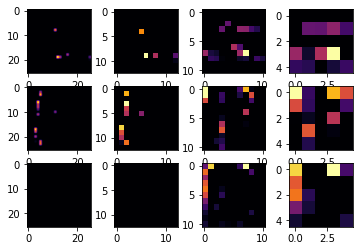

In [37]:
# visualizando as etapas de convolução
f, axarr = plt.subplots(3,4)
FIRST_IMAGE=23
SECOND_IMAGE=7
THIRD_IMAGE=26
CONVOLUTION_NUMBER = 1
from tensorflow.keras import models
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)
for x in range(0,4):
  f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)